/Users/marxena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


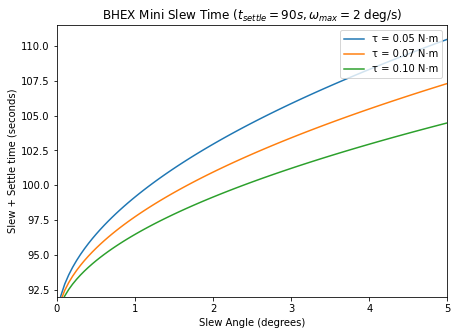

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# ---------------- Parameters ----------------
tau_list_Nm = [0.05, 0.07, 0.10]   # list of reaction-wheel torques [N·m]
I_kgm2      = 60.0           # moment of inertia [kg·m^2]
wmax_deg_s  = 2.0            # max body rate [deg/s]
t_settle_s  = 90.0           # fixed settle time [s]
# ---------------------------------------------------------

wmax = np.deg2rad(wmax_deg_s)                 # rad/s
angles_deg = np.linspace(0, 5, 100)
angles_rad = np.deg2rad(angles_deg)

def slew_time_total(theta_rad, wmax, alpha, t_settle):
    """Total time for triangular/trapezoid slew + fixed settle time."""
    t_accel = wmax / alpha
    theta_accel = alpha * t_accel**2  # = w_max**2 / alpha; comes from d = 1/2 * a * t^2

    if theta_rad <= theta_accel: # triangular-profile slew
        t_ramp = sqrt(theta_rad / alpha)
        t_slew = 2 * t_ramp
    else: # trapezoidal-profile slew
        t_cruise = (theta_rad - theta_accel) / wmax
        t_slew = 2 * t_accel + t_cruise
    return t_slew + t_settle

# Compute and plot for each tau in the list
plt.figure(figsize=(7,5))
all_times = {}

for tau in tau_list_Nm:
    alpha = tau / I_kgm2
    times_s = np.array([slew_time_total(th, wmax, alpha, t_settle_s) for th in angles_rad])
    all_times[tau] = times_s
    plt.plot(angles_deg, times_s, label=f"τ = {tau:.2f} N·m")

plt.xlabel("Slew Angle (degrees)")
plt.ylabel("Slew + Settle time (seconds)")
plt.title("BHEX Mini Slew Time ($t_{settle} = 90s, \omega_{max} = 2$ deg/s)")
plt.xlim(0, 5)
plt.legend(loc = "upper right")
plt.ylim(92)
plt.savefig('BHEXMiniSlew.png', dpi=300, bbox_inches='tight')